In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
from dataset import DataSet
import pandas as pd
from sklearn.decomposition import PCA
%load_ext autoreload
np.random.seed(2) ## keep same shuffled as was trained on 
torch.manual_seed(2)

In [20]:
%autoreload

## load a checkpoint & dataset the network trained on

In [21]:
lcs = utils.get_data('../../datasets/ZTF_gri',shuffle=True, split=0.01,batch_size=1)


validated 3407 files out of 3407 for band='r'
validated 3407 files out of 3407 for band='i'
validated 3408 files out of 3408 for band='g'
created union_tp attribute of length 3500
dataset created w/ shape (2683, 3, 4431, 3)
train size: 26, valid size: 26, test size: 2657


In [22]:
net, optimizer, args, epoch, loss, train_loss, test_loss = utils.load_checkpoint('../checkpoints/final/ZTF_gri0.7991786003112793.h5', lcs.data_obj)


=> loading checkpoint '../checkpoints/final/ZTF_gri0.7991786003112793.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_all_noz', checkpoint='ZTF_all_noz0.7986480593681335.h5', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=20000, frac=0.5, batch_size=2, mse_weight=5.0, dropout=0.0, num_resamples=0, lr=1e-08, scheduler=False, warmup=4000, kl_zero=False, kl_annealing=True, net='hetvae', device='mps', const_var=False, var_per_dim=False, std=0.1, seed=2, save=True, k_iwae=1)


## ANOMOLOUS WRT NLL/MSE

In [24]:
avg_nll,avg_mse,nlls, indy_nlls,mses=utils.evaluate_hetvae(net,len(lcs.bands),lcs.data_obj['train_loader'],frac=0.5,qz_mean=True)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:27<00:00,  1.06s/it]

nll: 2466.5759, mse: 1.9205, mae: 1.0427, mean_mse: 29.0976, mean_mae: 1.0427


[tensor(1.3611, device='mps:0'),
 tensor(2.6925, device='mps:0'),
 tensor(1.2939, device='mps:0'),
 tensor(1.3340, device='mps:0'),
 tensor(2.3948, device='mps:0'),
 tensor(1.5293, device='mps:0'),
 tensor(1.6408, device='mps:0'),
 tensor(1.0202, device='mps:0'),
 tensor(1.3739, device='mps:0'),
 tensor(0.8884, device='mps:0'),
 tensor(0.2944, device='mps:0'),
 tensor(1.1336, device='mps:0'),
 tensor(1.4361, device='mps:0'),
 tensor(1.5437, device='mps:0'),
 tensor(7.1746, device='mps:0'),
 tensor(2.0962, device='mps:0'),
 tensor(1.0135, device='mps:0'),
 tensor(8.0219, device='mps:0'),
 tensor(1.4167, device='mps:0'),
 tensor(1.1083, device='mps:0'),
 tensor(4.8419, device='mps:0'),
 tensor(2.4003, device='mps:0'),
 tensor(1.5163, device='mps:0'),
 tensor(0.7881, device='mps:0'),
 tensor(1.6734, device='mps:0'),
 tensor(1.7079, device='mps:0')]

In [18]:
nlls

array([-8.4770021e+00, -8.4770021e+00, -1.4902449e+01, -1.4902449e+01,
       -4.7117759e+03, -4.7117759e+03, -4.0050150e+02, -4.0050150e+02,
       -2.0022780e+03, -2.0022780e+03, -7.9702805e+01, -7.9702805e+01,
       -1.0232115e+04, -1.0232115e+04, -2.2846143e+02, -2.2846143e+02,
       -1.4230367e+04, -1.4230367e+04, -6.4103716e+03, -6.4103716e+03,
       -4.7071177e+03, -4.7071177e+03, -1.2983907e+03, -1.2983907e+03,
       -3.8463010e+03, -3.8463010e+03, -4.2287316e+00, -4.2287316e+00,
       -1.2176327e+04, -1.2176327e+04, -2.1080612e+01, -2.1080612e+01,
       -1.6204915e+04, -1.6204915e+04, -9.7841071e+02, -9.7841071e+02,
       -2.4209736e+03, -2.4209736e+03, -1.4662582e+01, -1.4662582e+01,
       -3.9000179e+01, -3.9000179e+01, -3.0234973e+00, -3.0234973e+00,
       -1.8869983e+03, -1.8869983e+03, -1.2643906e+01, -1.2643906e+01,
       -1.7006372e+02, -1.7006372e+02, -2.0639929e+03, -2.0639929e+03],
      dtype=float32)

(array([2491.,  114.,   26.,   16.,   10.,    8.,    8.,    4.,    3.,
           3.]),
 array([1.3632984e+00, 7.6346943e+03, 1.5268025e+04, 2.2901355e+04,
        3.0534688e+04, 3.8168020e+04, 4.5801348e+04, 5.3434680e+04,
        6.1068012e+04, 6.8701344e+04, 7.6334672e+04], dtype=float32),
 <BarContainer object of 10 artists>)

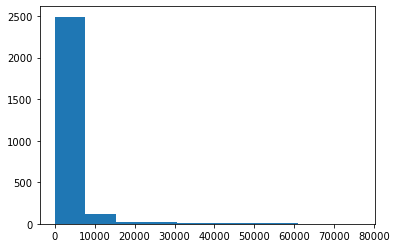

In [11]:
plt.hist(-1 *nlls)

In [12]:
mu = np.mean(nlls)
std = np.std(nlls)
anoms_i = (nlls > (mu+(2*std))) | (nlls < (mu-(2*std)))

In [18]:
lcs.valid_files_df.index[anoms_i]

Index(['080553.49+425548.1', '081925.85+364214.4', '083011.71+540148.4',
       '081209.24+560038.1', '084413.21+590109.8', '233209.51+492445.7',
       '080621.87+131250.7', '080125.89+222402.8', '084527.73+491943.3',
       '101514.83+430636.7', '081514.60+120540.2', '095439.73+420109.5',
       '114521.43+040042.2', '104426.81+321502.0', '104655.60-030353.8',
       '083206.41+345817.7', '142249.29+312711.0', '094502.34+320646.6',
       '231120.71+245134.2', '231506.62+263149.9', '084108.39+540827.6',
       '085717.47+182335.2', '153535.79+175544.5', '075532.40+503603.7',
       '105320.37+420632.9', '093909.42+014433.5', 'H2106-099',
       '083331.04+450419.8', '230029.46+321930.9', '151015.05+220438.0',
       '095011.62+372600.1', '090903.94+463730.6', '220715.80+223545.1',
       '231331.22+262740.9', '073922.89+412321.2', '140837.42+164025.4',
       '095514.77+331558.2', '080042.41+435454.7', '093439.77+013959.1',
       '090755.34+445219.4', '075116.33+493143.4', '094944.7

In [22]:
anoms_gri = ['080553.49+425548.1', '081925.85+364214.4', '083011.71+540148.4',
       '081209.24+560038.1', '084413.21+590109.8', '233209.51+492445.7',
       '080621.87+131250.7', '080125.89+222402.8', '084527.73+491943.3',
       '101514.83+430636.7', '081514.60+120540.2', '095439.73+420109.5',
       '114521.43+040042.2', '104426.81+321502.0', '104655.60-030353.8',
       '083206.41+345817.7', '142249.29+312711.0', '094502.34+320646.6',
       '231120.71+245134.2', '231506.62+263149.9', '084108.39+540827.6',
       '085717.47+182335.2', '153535.79+175544.5', '075532.40+503603.7',
       '105320.37+420632.9', '093909.42+014433.5', 'H2106-099',
       '083331.04+450419.8', '230029.46+321930.9', '151015.05+220438.0',
       '095011.62+372600.1', '090903.94+463730.6', '220715.80+223545.1',
       '231331.22+262740.9', '073922.89+412321.2', '140837.42+164025.4',
       '095514.77+331558.2', '080042.41+435454.7', '093439.77+013959.1',
       '090755.34+445219.4', '075116.33+493143.4', '094944.78+364334.7',
       '091244.28-022435.8', '081615.35+550615.5', '082917.77+465814.9',
       '230048.77+194316.7', '110007.99+613425.5', '230013.06+195754.6',
       '083417.29+554206.9', '081814.51+550341.7', '115213.39+072600.8',
       '231334.28+250812.3', '084141.22+540256.9', '082439.54+453855.6',
       '083508.42+560953.8', '082013.95+543733.2', '120928.11+003511.6',
       '080544.90+460937.5', '122321.06+005745.7', '094402.40+500601.3',
       '223552.47+244703.1', '085850.41+393219.0', '074645.63+355902.2',
       '104918.70+143645.4', '123249.72+242034.8', '112159.53+143521.9',
       '112424.59+065456.0', '212822.69+115947.5', '160405.09+174853.7',
       '121907.80-005609.2', '095503.28+524957.6', '220444.32+294255.8',
       '083246.15+522526.2', '082104.84-002646.5']


anoms_g = ['122606.13+233546.1', '144827.83+084130.5', '013300.65+160516.3',
       '164933.00+205839.0', '124152.93+240026.4', '100516.42+364214.7',
       '090136.66+474233.0', '143234.58+454441.2', '150232.97+062337.6',
       '082436.86+133612.4', '222852.60-075346.6', '081249.41+454629.9',
       '140519.92+474553.9', '091101.87+280746.9', '144837.61+112104.1',
       '160324.86+231531.5', '114552.32+241732.3', '141548.59+422522.9',
       '142535.31+530019.3', '075627.68+272326.3', '021251.11-004337.8',
       '080217.01+280609.2', '155149.75+141955.7', '124631.21+530111.0',
       '100500.68+315847.8', '095739.64+454557.4', '085027.12+351320.1',
       '161924.11+260907.2', '085749.87+415223.8', '142249.29+312711.0',
       '104211.35+454746.7', '034430.16+000407.3', '161524.59+190002.5',
       '133149.10+150055.5', '232529.43-004735.0', '135407.35+351509.7',
       '151720.91+332129.6', '102853.66+174148.5', '151524.56+160912.3',
       '151215.76+170638.0', '222808.99+185920.8', '110901.46+474200.1',
       '151009.36+323913.8', '145954.07+351733.9', '152530.99+250108.4',
       '093137.42+564545.0', '114230.42+312002.4', '162614.31+483912.0',
       '080534.87+422907.9', '125812.90+371151.3', '151020.36+185632.2',
       '160815.29+043605.9', '164334.44+241132.2', '130255.44+241210.2',
       '133351.07+232201.6', '123637.00+332215.7', '100106.38+030309.8',
       '161431.70+170311.5', '094838.89+052127.0', '152312.86+154654.6',
       '092322.60+043239.0', '085850.41+393219.0']

In [ ]:
anoms_gri 

In [21]:
len(anoms)

74

In [15]:
#np.savetxt('nlls_gri', nlls)

In [24]:
tr = int(len(lcs.dataset) * 0.9) # train-test split point
len(list(set(lcs.valid_files_df.index[tr:]) & set(anoms_gri)))

4

In [26]:
len(list(set(anoms_g) & set(anoms_gri)))

2